In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

League of Legends Match Analysis Data

In [3]:
df = pd.read_csv("League_of_Legends_Data - Sheet1 - V1.csv")

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       210 non-null    int64  
 1   game_duration  210 non-null    object 
 2   patch_version  210 non-null    float64
 3   queue_type     210 non-null    object 
 4   team           210 non-null    object 
 5   role           210 non-null    object 
 6   champion       210 non-null    object 
 7   win_loss       210 non-null    object 
 8   kills          210 non-null    int64  
 9   deaths         210 non-null    int64  
 10  assists        210 non-null    int64  
 11  cs             210 non-null    int64  
 12  cs_per_min     210 non-null    float64
 13  gold_earned    210 non-null    int64  
 14  damage         210 non-null    int64  
 15  vision_score   210 non-null    int64  
 16  first_blood    210 non-null    object 
 17  game_review    210 non-null    object 
dtypes: float64

In [6]:
# Create KDA column
df['KDA'] = (df['kills'] + df['assists']) / df['deaths'].replace(0, np.nan)
df.head()

,match_id,game_duration,patch_version,queue_type,team,role,champion,win_loss,kills,deaths,assists,cs,cs_per_min,gold_earned,damage,vision_score,first_blood,game_review,KDA
0,5486945849,0:24:40,26.3,ranked,blue,top,Dr.Mundo,win,15,5,8,203,8.2,14609,28831,8,no,Late Bloomer,4.6
1,5486945849,0:24:40,26.3,ranked,blue,jungle,Diana,win,12,2,11,151,6.1,12186,22058,27,no,Unstoppable,11.5
2,5486945849,0:24:40,26.3,ranked,blue,mid,Vex,win,5,2,10,133,5.4,8460,18730,20,no,Late Bloomer,7.5
3,5486945849,0:24:40,26.3,ranked,blue,adc,Jinx,win,10,1,7,228,9.2,13573,29852,12,no,Unstoppable,17.0
4,5486945849,0:24:40,26.3,ranked,blue,support,Nami,win,0,2,25,14,0.6,7945,6698,29,no,Unstoppable,12.5


This creates a new column showing the KDA conversions per player

In [8]:
# Convert game_duration to minutes
df['game_minutes'] = df['game_duration'].apply(lambda x: int(x.split(":")[0]) + int(x.split(":")[1])/60)

In [9]:
df.head()

,match_id,game_duration,patch_version,queue_type,team,role,champion,win_loss,kills,deaths,assists,cs,cs_per_min,gold_earned,damage,vision_score,first_blood,game_review,KDA,game_minutes
0,5486945849,0:24:40,26.3,ranked,blue,top,Dr.Mundo,win,15,5,8,203,8.2,14609,28831,8,no,Late Bloomer,4.6,0.4
1,5486945849,0:24:40,26.3,ranked,blue,jungle,Diana,win,12,2,11,151,6.1,12186,22058,27,no,Unstoppable,11.5,0.4
2,5486945849,0:24:40,26.3,ranked,blue,mid,Vex,win,5,2,10,133,5.4,8460,18730,20,no,Late Bloomer,7.5,0.4
3,5486945849,0:24:40,26.3,ranked,blue,adc,Jinx,win,10,1,7,228,9.2,13573,29852,12,no,Unstoppable,17.0,0.4
4,5486945849,0:24:40,26.3,ranked,blue,support,Nami,win,0,2,25,14,0.6,7945,6698,29,no,Unstoppable,12.5,0.4


In [11]:
df.describe()

,match_id,patch_version,kills,deaths,assists,cs,cs_per_min,gold_earned,damage,vision_score,KDA,game_minutes
count,2.100000e+02,2.100000e+02,210.000000,210.00000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,204.000000,210.000000
mean,5.488775e+09,2.630000e+01,6.442857,6.42381,8.461905,167.285714,5.713810,12289.571429,23519.985714,32.861905,3.060433,0.483333
std,1.668472e+06,1.032749e-13,4.834987,3.41211,5.912518,81.939260,2.593745,4109.925212,13649.304716,27.874376,2.839312,0.105787
min,5.483552e+09,2.630000e+01,0.000000,0.00000,0.000000,14.000000,0.600000,4329.000000,2553.000000,4.000000,0.111111,0.283333
25%,5.487466e+09,2.630000e+01,3.000000,4.00000,4.000000,122.250000,4.700000,9073.250000,12566.000000,17.000000,1.333333,0.400000
50%,5.489694e+09,2.630000e+01,6.000000,6.00000,8.000000,180.000000,6.350000,11985.500000,21952.500000,24.500000,2.174242,0.500000
75%,5.489827e+09,2.630000e+01,9.000000,9.00000,12.000000,224.500000,7.575000,15189.500000,31344.250000,35.000000,4.000000,0.533333
max,5.490213e+09,2.630000e+01,22.000000,16.00000,30.000000,337.000000,10.700000,22614.000000,68370.000000,185.000000,18.000000,0.683333


In [12]:
# Count games by queue_type

df['queue_type'].value_counts()

,count
queue_type,
ranked,130
ranked flex,80


<Axes: xlabel='role', ylabel='gold_earned'>

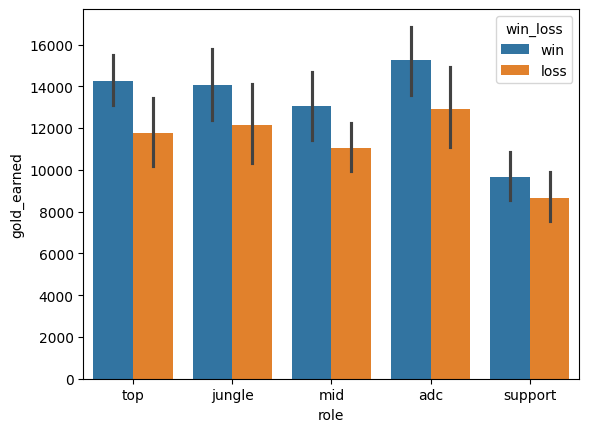

In [13]:
# Visualizations (graph 1) Average Gold by Role

sns.barplot(data=df, x='role', y='gold_earned', hue='win_loss')

This shows the average gold_earned by role type based on win_loss

<Axes: xlabel='KDA', ylabel='Count'>

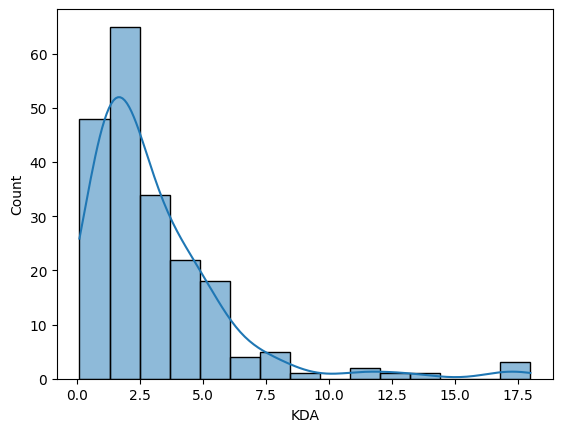

In [14]:
# Visualizations (graph 2) KDA distribution

sns.histplot(df['KDA'].dropna(), bins=15, kde=True)

This shows how common different KDA ranges are across the data collected in these games

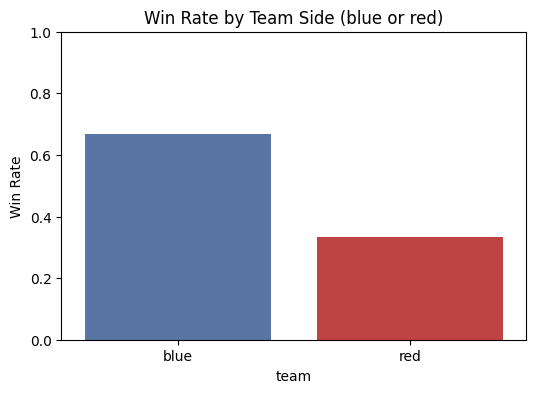

In [44]:
# Visualizations (graph 3) win rates based on being blue or red side

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# There were extra spaces in the team column, that we must remove to get this graph to work

df['team'] = df['team'].str.strip()

# Calculate win rates for each team side (blue and red)
win_rates = df.groupby('team')['win_loss'].apply(lambda x: (x== 'win').mean()).reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='team', y='win_loss', hue='team', data=win_rates, palette={'blue':'#4C72B0', 'red':'#D32F2F'},
    dodge=False) # this helps keep a single bar per team side
plt.ylim(0,1)
plt.ylabel('Win Rate')
plt.title('Win Rate by Team Side (blue or red)')
plt.show()

This graph shows win rates based on if players were blue or red side starting

In [19]:
# create a first blood win column
# players who got first blood AND won

df['first_blood_win'] = (df['first_blood'] == 'yes') & (df['win_loss'] == 'win')
df.head()

,match_id,game_duration,patch_version,queue_type,team,role,champion,win_loss,kills,deaths,...,cs,cs_per_min,gold_earned,damage,vision_score,first_blood,game_review,KDA,game_minutes,first_blood_win
0,5486945849,0:24:40,26.3,ranked,blue,top,Dr.Mundo,win,15,5,...,203,8.2,14609,28831,8,no,Late Bloomer,4.6,0.4,False
1,5486945849,0:24:40,26.3,ranked,blue,jungle,Diana,win,12,2,...,151,6.1,12186,22058,27,no,Unstoppable,11.5,0.4,False
2,5486945849,0:24:40,26.3,ranked,blue,mid,Vex,win,5,2,...,133,5.4,8460,18730,20,no,Late Bloomer,7.5,0.4,False
3,5486945849,0:24:40,26.3,ranked,blue,adc,Jinx,win,10,1,...,228,9.2,13573,29852,12,no,Unstoppable,17.0,0.4,False
4,5486945849,0:24:40,26.3,ranked,blue,support,Nami,win,0,2,...,14,0.6,7945,6698,29,no,Unstoppable,12.5,0.4,False


This creates a new column for players who got first blood AND won their game

In [22]:
# Group by role and summarize
role_fb_stats = df[df['first_blood'] == 'yes'].groupby('role').agg(
    first_blood_count=('first_blood', 'count'),
    wins_with_fb=('first_blood_win', 'sum')
)

# Win rate when getting first blood
role_fb_stats['win_rate'] = role_fb_stats['wins_with_fb'] / role_fb_stats['first_blood_count']

role_fb_stats

,first_blood_count,wins_with_fb,win_rate
role,,,
adc,5,4,0.800000
jungle,6,4,0.666667
mid,1,0,0.000000
support,1,0,0.000000
top,8,5,0.625000


This shows which roles get first blood, how often they win if they get first blood, and their win rate

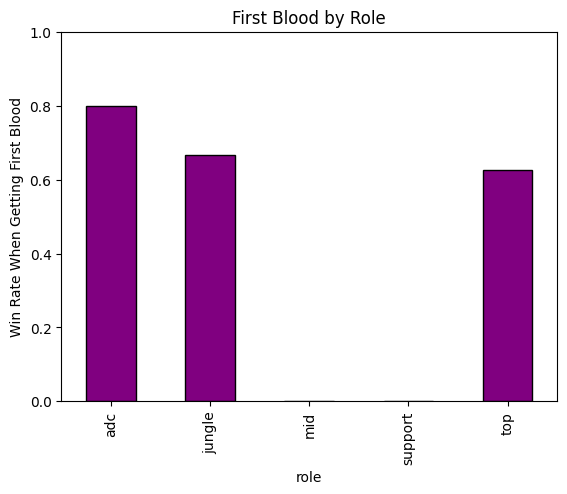

In [33]:
# Visualization (graph 4) First Blood by Role & Win Rates When Getting First Blood

import matplotlib.pyplot as plt

role_fb_stats['win_rate'].plot(kind='bar', color='purple', edgecolor='black')
plt.ylabel('Win Rate When Getting First Blood')
plt.title('First Blood by Role')
plt.ylim(0,1)
plt.show()

This shows which roles are most effective at converting first blood into a win

In [34]:
# Count how many times each champion was played in each role

champ_role_counts = df.groupby(['champion', 'role']).size().reset_index(name='count')

champ_role_counts

,champion,role,count
0,Aatrox,jungle,1
1,Ahri,mid,1
2,Akali,mid,1
3,Alistar,support,1
4,Amumu,jungle,5
...,...,...,...
124,Yuumi,support,1
125,Zaahen,top,4
126,Zeri,adc,1
127,Ziggs,adc,1


This shows how many champions were picked in each role

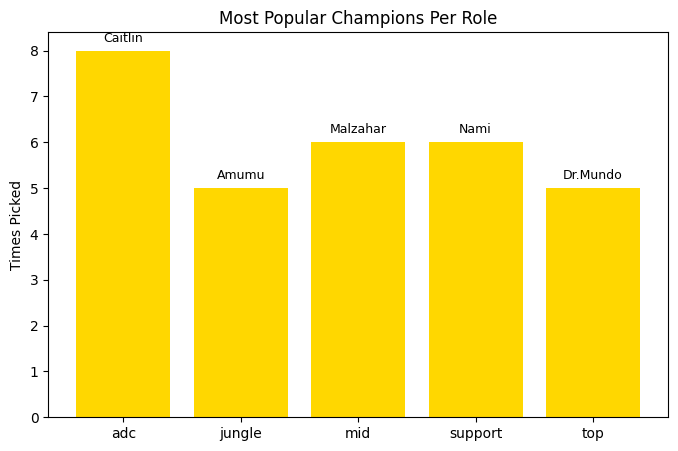

In [40]:
# Visualizations (graph 5) Show which champions are the most picked per role

import pandas as pd
import matplotlib.pyplot as plt

top_champions = df.groupby(['champion', 'role']).size().reset_index(name='count')

top_per_role = top_champions.loc[top_champions.groupby('role')['count'].idxmax()]

plt.figure(figsize=(8,5))
plt.bar(top_per_role['role'], top_per_role['count'], color='gold')
for i, row in top_per_role.iterrows():
  plt.text(row['role'], row['count']+0.2, row['champion'], ha='center', fontsize=9)
plt.ylabel('Times Picked')
plt.title('Most Popular Champions Per Role')
plt.show()

This graph shows the most popular champions by pick rates, per role